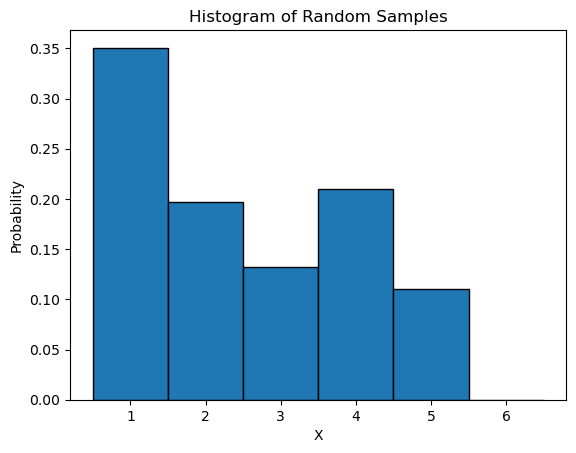

In [1]:
# 1.(a) Generate 500 random samples using the inverse transform method and produce histogram

import numpy as np
import matplotlib.pyplot as plt

# Given pmf
X = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Compute the CDF
cdf = np.cumsum(pmf)

# Generate random uniform samples
random_uniform_samples = np.random.rand(500)

# Use the inverse CDF to get samples from the desired distribution
random_samples = np.searchsorted(cdf, random_uniform_samples) 

# Plot the histogram
plt.hist(random_samples, bins=np.arange(0.5, 7.5, 1), edgecolor='black', align='mid', density=True)
plt.title('Histogram of Random Samples')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

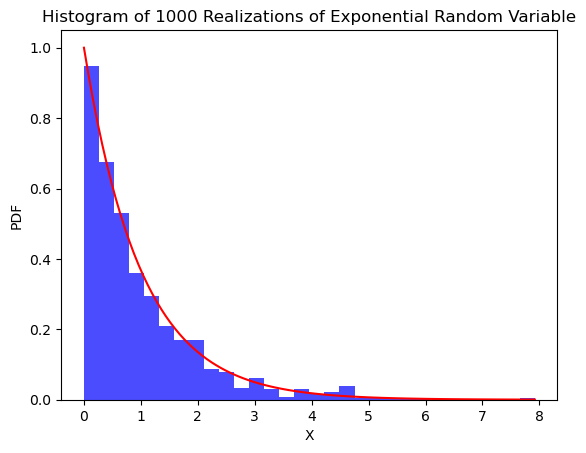

In [2]:
# 1.(b)  pdf from CDF using inverse CDF method and produce histogram for 1000 realization

# Define the CDF of the standard exponential distribution
def exponential_cdf(x, lamda):
    return 1 - np.exp(-lamda * x)

# Inverse CDF method to sample from the standard exponential distribution
def inverse_cdf_exponential(lamda, size=1000):
    u = np.random.rand(size)
    x = -np.log(1 - u) / lamda
    return x

# Parameters for the standard exponential distribution
lamda = 1
sample_size = 1000

# Generate random samples using the inverse CDF method
samples = inverse_cdf_exponential(lamda,size=1000)

# for plotting the theoretical pdf for comparison
def theoretical_pdf(x, lambda_val):
    return lambda_val * np.exp(-lambda_val * x)
x_theoretical = np.linspace(0, max(samples), 100)

# Plot a histogram of the generated samples
plt.plot(x_theoretical, theoretical_pdf(x_theoretical, lamda), 'r-', label='True PDF')
plt.hist(samples, bins=30, density=True, color='blue', alpha=0.7, label='Sampled Data')
plt.title('Histogram of 1000 Realizations of Exponential Random Variable')
plt.xlabel('X')
plt.ylabel('PDF')
plt.show()

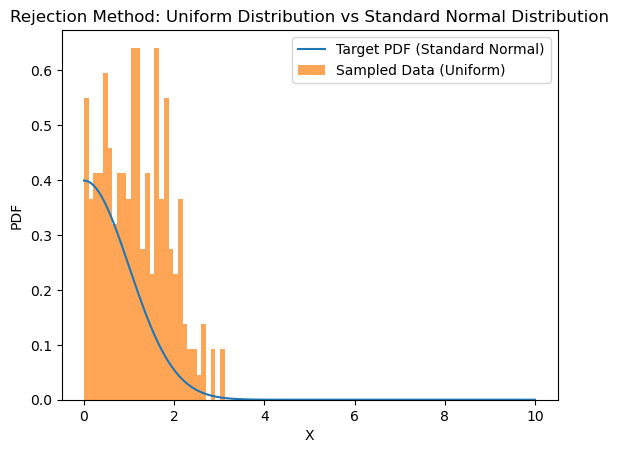

In [3]:
# 2 Rejection Method

import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_size = 1000
lower_bound = 0
upper_bound = 10

# Target distribution (standard normal)
def target_distribution(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Proposal distribution (uniform)
uniform_samples = np.random.uniform(lower_bound, upper_bound, sample_size)

# Acceptance/rejection criterion
acceptance_criteria = target_distribution(uniform_samples) / (1 / (upper_bound - lower_bound))

# Generate random values from a uniform distribution to determine acceptance or rejection
random_values = np.random.rand(sample_size)

# Accept the sample if it falls within the target distribution; otherwise, reject it
accepted_samples = uniform_samples[random_values < acceptance_criteria]

# Plotting
x = np.linspace(lower_bound, upper_bound, 1000)
plt.plot(x, target_distribution(x), label='Target PDF (Standard Normal)')
plt.hist(accepted_samples, bins=30, density=True, alpha=0.7, label='Sampled Data (Uniform)')
plt.title('Rejection Method: Uniform Distribution vs Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.show()

In [4]:
# Bonus

import numpy as np

# Given values
sensitivity = 0.95
specificity = 0.90
prevalence = 0.01
sample_size = 1000

# Bayes' Theorem to calculate PPV
ppv_formula = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))

# Simulation
simulated_results = np.random.rand(sample_size) < prevalence
positive_results = np.random.rand(sample_size) < sensitivity

# Calculate PPV from the simulation
ppv_simulation = np.sum(positive_results & simulated_results) / np.sum(positive_results)

print("PPV (Formula): {:.4f}".format(ppv_formula))
print("PPV (Simulation): {:.4f}".format(ppv_simulation))

PPV (Formula): 0.0876
PPV (Simulation): 0.0053
